<a href="https://colab.research.google.com/github/RanojoyBiswas/Netflix-Movies-TV-Shows-Clustering---Ranajay-Biswas/blob/main/Netflix_Movies_%26_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**    - Netflix Movies & TV Shows Clustering



### **Contributor :** Ranajay Biswas

### **Github Link :**

### **Project Type**    - Unsupervised

## **Project Summary -**

Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries and more – on thousands of internet-connected devices. New TV shows and movies are added every week!

Netflix has an extensive library of feature films, documentaries, shows, award-winning Netflix originals, and tons of other contents.

In this unsupervised Machine Learning project, we have to find out different patterns and insights about various movies and shows. 

Clustering similar contents and developing a content based recommender system that is capable of recommending new movies and shows to users as per their interests is going to be our main goal.

Performing Exploratory data analysis, insights can be drawn from the data that can be used to better understand the production and demand for different content in different countries. Evaluating genres and content rating for different age groups, we can find out which demographic is dominated by what kind of audience.

Analyzing audiences' taste and finding similar content will help to build intelligent recommendation systems that will be able to satisfy the audience's appetite for content consumption.

## **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### <b>In this  project, it we are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



## **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Approach:**

This project is heavily dependent upon analyzing the data and finding significant patterns and trends to find movies and shows which are similar to each other. This way Netflix can be more confident when making recommendations to their audience. It is also going to be helpful to know what type of content is going to be more popular among their platform users. So that Netflix can produce or add those new shows and movies on their platform.

Our approach to solve this problem is going to be - 

1. Understanding the dataset, different rows and columns.

2. During the EDA, we will try to find popular actors and directors, what are the top content producing countries. We will get an idea about different genres and runtimes for different contents. Statistical methods and Visualizations are going to be very helpful in this EDA process.

3. In the pre-processing step, we shall filter the most important features, make necessary transformations, create or omit features as needed. Depending on the features we choose, we will find best approaches for text pre-processing. Then we will have the data, ready for implementing clustering algorithms or building a recommender system with this data.

4. Using Topic Modelling, we will try to find popular genres. We shall try different clustering algorithms to see which fits the data best. The best performing algorithm will be selected and then we shall analyze different clusters made by the algorithm to find patterns and insights.

5. Then we shall conclude the project with an overview and discussion about the observations that we make and how that can prove to be useful for Netflix's streaming services.

## **Data Collection & Summary:**

Very first step is to import the libraries for the task. We shall start off by importing the absolute necessary packages and as we continue working on the data, we will be adding more to the list.

In [1]:
#invite people for the party
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr # Pearson's r

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

from sklearn.metrics.pairwise import cosine_similarity  # used to calculate distance or similarity
from sklearn.feature_extraction.text import TfidfVectorizer   # importing TfidVectorizer from sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime, timezone, timedelta

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score  #davies_bouldin_score of clusters 
from scipy.stats import zscore
from sklearn import metrics

In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# importing Natural Language Toolkit
import nltk
import re

In [4]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
from nltk.corpus import stopwords  # Stopwords
from nltk.stem import PorterStemmer  # stemmer package
from nltk.stem import WordNetLemmatizer  # Lemmatizer

In [6]:
sns.set(font_scale = 1.5)

In [8]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# reading data set
dataset = pd.read_csv('/content/drive/MyDrive/ML Unsupervised Projects/Netflix Movies & TV Shows Clustering - Ranajay Biswas/Datasets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',  encoding= 'unicode_escape')

In [10]:
pd.set_option('display.max_columns', None)

Checking the data:

In [11]:
# top 5 rows of the data
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
# last 5 rows of the data
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [13]:
# checking the shape of our data
dataset.shape

(7787, 12)

In [14]:
# checking columns
dataset.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [15]:
# datatypes and null values overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### *Dataset has 7787 rows and 12 columns. And it contains object, integer and float data types*...

### <b>Descriptive Stats ---

In [16]:
# descriptive statistics
dataset.describe(percentiles=[.1, .9])

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
10%,2006.000000
50%,2017.000000
90%,2020.000000
max,2021.000000


Since, most of the columns are object data type, Descriptive statistics does not give us any important insight about the data.

## **Exploratory Data Analysis:**


Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

### *Discovering the null values in the data* ---

In [17]:
def missing_value_checker(dataframe):

  '''this function takes a dataframe as input and returns the count 
      and percentage of data that are misssing in each column'''

  # checking the number of null values
  number_missing = dataframe.isnull().sum()

  # checking the number of null values
  percent_missing = round(dataframe.isnull().sum() * 100 / len(dataframe), 2)

  # dataframe containing the count & percentage
  dat = pd.DataFrame(list(zip(list(dataframe.columns), number_missing, percent_missing)) , columns =['feature','observations_missing', 'percentage_missing']).set_index('feature')

  return dat

In [18]:
#  dataframe containing the exact number and percentage of missing values for each column
missing = missing_value_checker(dataset)
missing.sort_values('observations_missing', ascending = False)

,observations_missing,percentage_missing
feature,,
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00


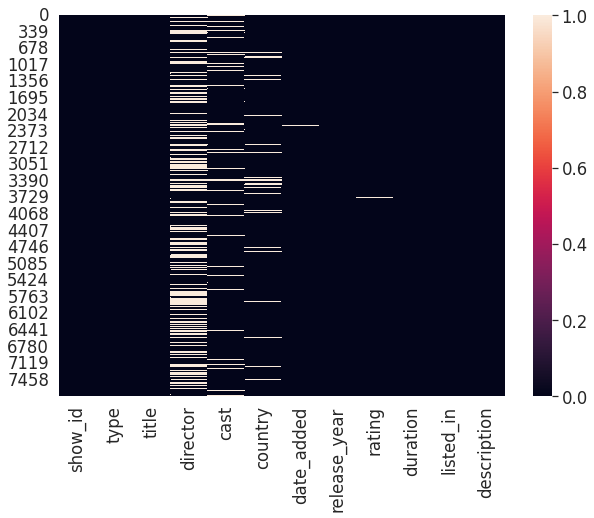

In [19]:
# plotting for null values
plt.figure(figsize=(10,7))
sns.heatmap(dataset.isnull())

It shows that there are many null values in the data.. Director column has roughly 31%, Cast column has 9%, Country column has 6.51%, Date_added column has 0.13% and Rating column has 0.09% null values...

### *Checking for duplicate values in the data..*

In [20]:
# duplicate
len(dataset[dataset.duplicated()])

0

 No duplicate values found in the data...

In [21]:
# making a copy of the original dataset 
df = dataset.copy()

In [22]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


### What are the numbers of total movies and total TV shows in the data?

In [23]:
content_type = df.groupby('type')['type'].count()
content_type

type
Movie      5377
TV Show    2410
Name: type, dtype: int64

We have 5377 movies and 2410  TV shows in the data. 

Let's visualize it using pie plot ---

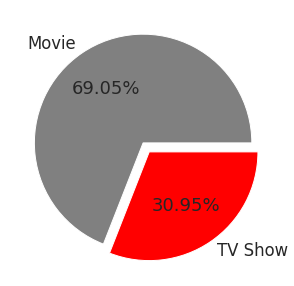

In [24]:
plt.figure(figsize=(10, 5))
plt.pie(content_type,autopct='%1.2f%%', explode = [0,0.1], labels=content_type.index, colors = ['grey', 'red'])
plt.show()

There is roughly 69% movies and 31% TV Shows present in the data.

### Analysing Based on 'Release Years' of movies and Shows:

 Oldest Movie or show available on Netflix:

In [25]:
# extracting the content type, title and the release year for the oldest content on netflix using the argmin() method
oldest = df.loc[df['release_year'].argmin(), ['type', 'release_year', 'title']].values

In [26]:
print(f' The oldest content available on netflix was originally released on',oldest[1], 'and the name of the', oldest[0], 'is', oldest[2])

 The oldest content available on netflix was originally released on 1925 and the name of the TV Show is Pioneers: First Women Filmmakers*


Newest Movies or Shows available on Netflix:

In [27]:
# extracting the content type, title and the release year for the newest content on netflix using argmax() function
newest = df.loc[df['release_year'].argmax(), ['type', 'release_year', 'title']].values

In [28]:
print(f' The newest content available on netflix was released on',newest[1], 'and the name of the', newest[0], 'is', newest[2])

 The newest content available on netflix was released on 2021 and the name of the TV Show is Bling Empire


Movies and shows available on netflix based the release years:

In [29]:
def histplot_withY(label, y_label, dataset):

  ''' A function to plot the distribution 
  and histograms of binned data'''

  bins = "auto"
  x = np.array(df[label])
  sns.set(font_scale = 1.5)

  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,7), constrained_layout=True)
  sns.distplot(dataset[label],color="b", ax=ax[0])
  ax[0].set_title(f"Distribution of content on Netflix based on {label}")

  ax[1] = sns.histplot(data=df, x=label, bins=bins, hue = y_label, palette='hls')

  ax[1].set_title(f'Movies & TV Shows on Netflix based on different release years')
  # ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
  plt.show()

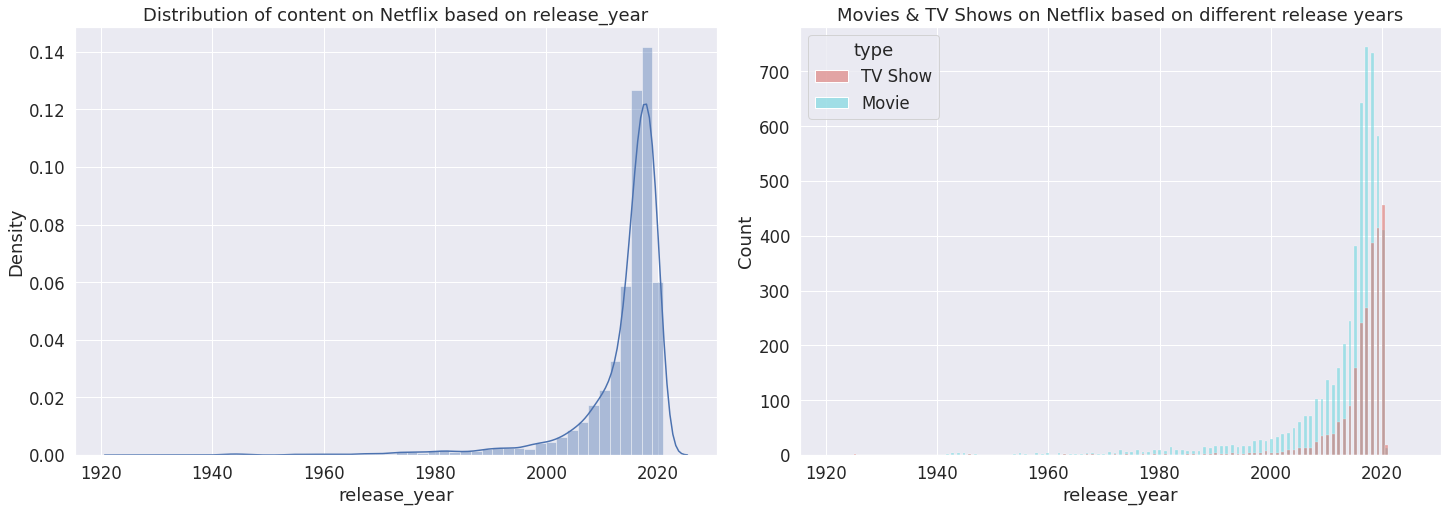

In [30]:
histplot_withY('release_year', 'type', df)

<b>Observation :</b>

*  The number of releases of movies and shows kept growing throughout the years.
*  Around 2019, we see a downfall in the releases. This a direct effect of Covid-19 Lockdown. The production in 2020 and 2021 is also low for the same reason.
* An interesting observations we can make is that in the last 2-3 years, Netflix focused heavily on TV shows compared to movies.

### Originals on Netflix:

If we consider that movies or shows that released the same year as the year they were added on Netflix to be Netflix Originals, then we can try to analyze how much of the present content on Netflix were produced and commissioned in-house by Netflix production crews themselves.

In [31]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [32]:
df['year_added'] = pd.DatetimeIndex(pd.to_datetime(df['date_added'])).year

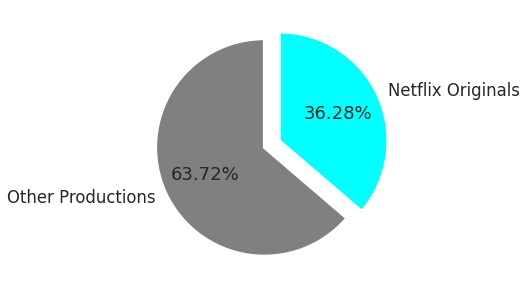

In [33]:
df['originals'] = np.where(df['release_year'] == df['year_added'], 'yes', 'no')

plt.figure(figsize=(10, 5))
plt.pie(df['originals'].value_counts(),autopct='%1.2f%%', explode = [0.1,0.05], labels=['Other Productions', 'Netflix Originals'], 
                wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = ["grey", "cyan"], startangle=90)
plt.show()

In [34]:
df['originals'].value_counts()

no     4962
yes    2825
Name: originals, dtype: int64

36% of content on Netflix are Netflix Originals.

In [35]:
org = df[df['originals'] == 'yes'] # df with the Netflix Originals Data

***Proportion of Shows vs Movies in the Originals:***

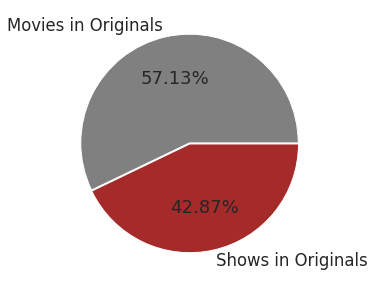

In [36]:
# content distribution for Netflix originals
plt.figure(figsize=(10, 5))
plt.pie(org['type'].value_counts(),autopct='%1.2f%%', explode = [0,0.01], labels=['Movies in Originals', 'Shows in Originals'], colors = ['grey', 'brown'])
plt.show()

Netflix produced more original movies than shows.

***Netflix's favourite Genres to produce:***

Text(0.5, 1.0, 'Top Genres for Netflix Originals')

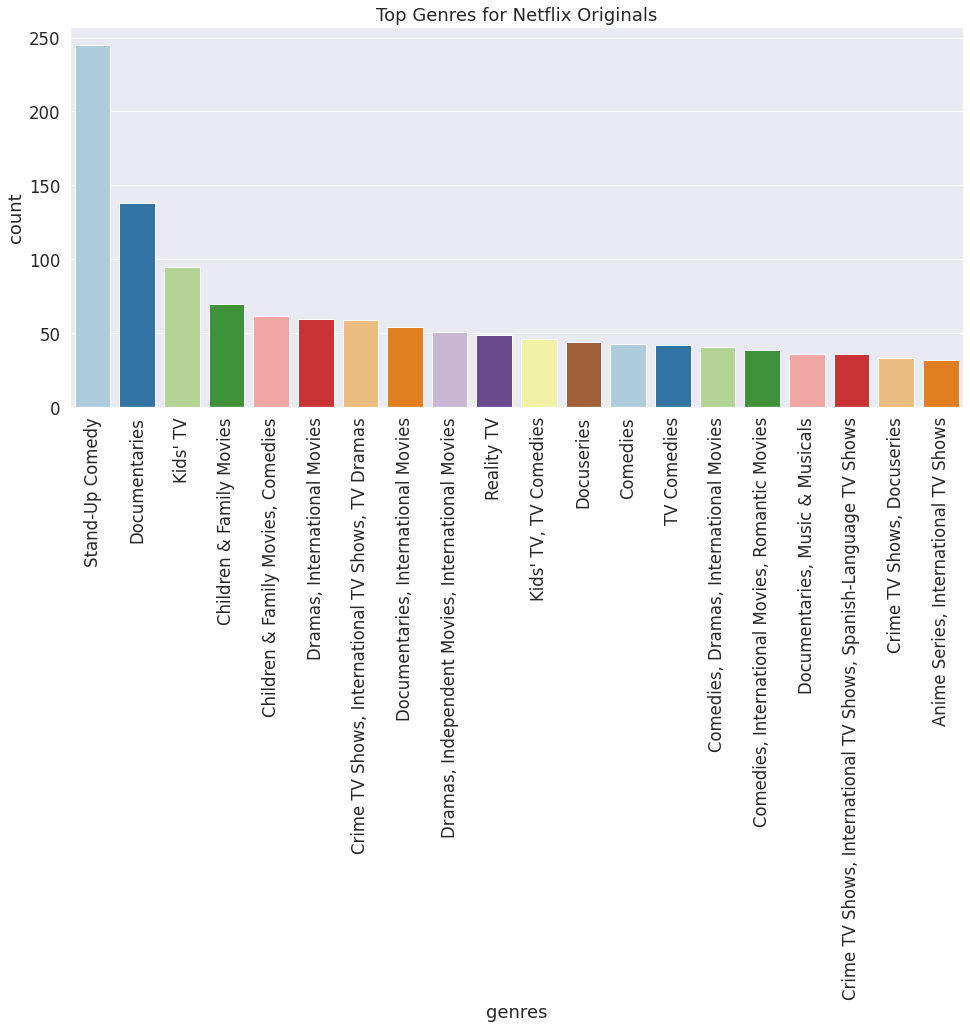

In [37]:
org_genre = org['listed_in'].value_counts().reset_index().rename(columns = {'index': 'genres', 'listed_in': 'count'}).head(20)

# plotting
plt.figure(figsize=(16, 7))
g =sns.barplot(x=org_genre['genres'], y = org_genre['count'], data=pd.melt(org_genre), palette = 'Paired')
g.set_xticklabels(labels = org_genre['genres'], rotation=90)
g.set_title(f"Top Genres for Netflix Originals")

* Originals mostly contain Stand-Up Comedies, Documentries and Kids-TV.
* Children & Family movies and Crime-Drama shows are also popular Netflix productions.

***Directors with the most Contributions For the Netflix Originals:***

Text(0.5, 1.0, 'Directors with most Originals on Netflix')

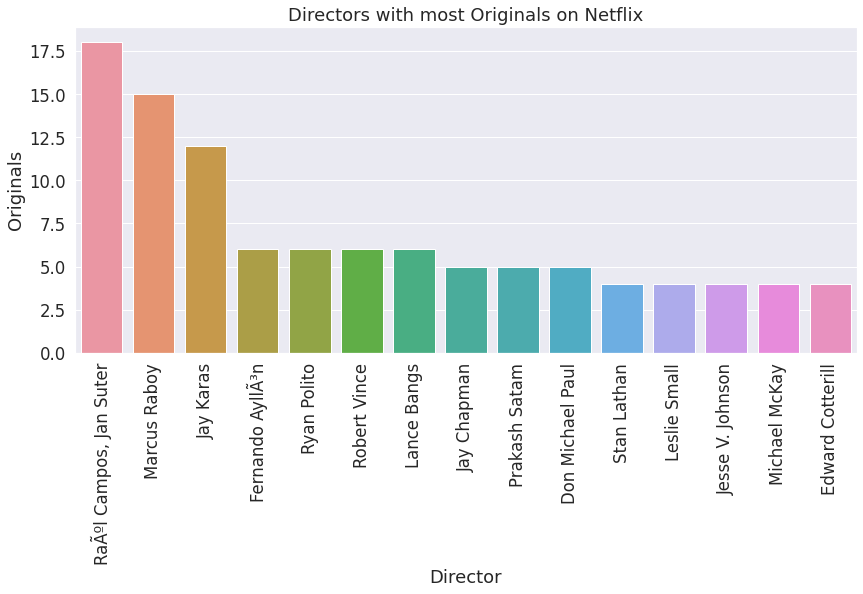

In [38]:
org_dir = org['director'].value_counts().reset_index().rename(columns = {'index': 'Director', 'director': 'Originals'}).head(15)


plt.figure(figsize=(14,6))
g = sns.barplot(x=org_dir['Director'], y = org_dir['Originals'], data=pd.melt(org_dir))
g.set_xticklabels(labels = org_dir['Director'], rotation=90)
g.set_title(f"Directors with most Originals on Netflix")

* Raul Campos and Jan Suter are the top Netflix Originals creators/Directors.

### Country-Wise Content on Netflix:

In [39]:
df['country_list'] = df['country'].astype(str)

In [40]:
df['country_list'] = df['country_list'].apply(lambda x: list(x.split(',')))

In [41]:
df['country_list'].apply(lambda x: [s.lstrip() for s in x])

0                                                [Brazil]
1                                                [Mexico]
2                                             [Singapore]
3                                         [United States]
4                                         [United States]
                              ...                        
7782    [Sweden, Czech Republic, United Kingdom, Denma...
7783                                              [India]
7784                                                [nan]
7785                                          [Australia]
7786              [United Kingdom, Canada, United States]
Name: country_list, Length: 7787, dtype: object

In [42]:
dict_ = {}
for i in df.iloc[:]['country_list']:
  # print(i)
  for lc in i:
    # print(lc)
    c = lc.strip()
    # print(c)
    if c in dict_.keys():
      dict_[c]+=1
    else:
      dict_[c] = 1

country_df = pd.DataFrame(list(dict_.items()), columns = ['country', 'number_of_content'])
country_df = country_df[country_df['country'] != 'nan']
country_df = country_df.sort_values('number_of_content', ascending = False)

Total no. of countries in the netflix data ---

In [43]:
print(f"There is a total {country_df['country'].nunique()} unique countries in the data")

There is a total 118 unique countries in the data


In [44]:
print(f'Top 20 countries with the most number of content on netflix: \n')
country_df.head(20)

Top 20 countries with the most number of content on netflix: 



,country,number_of_content
3,United States,3297
6,India,990
13,United Kingdom,723
17,Canada,412
22,France,349
14,Japan,287
20,Spain,215
15,South Korea,212
26,Germany,199
1,Mexico,154


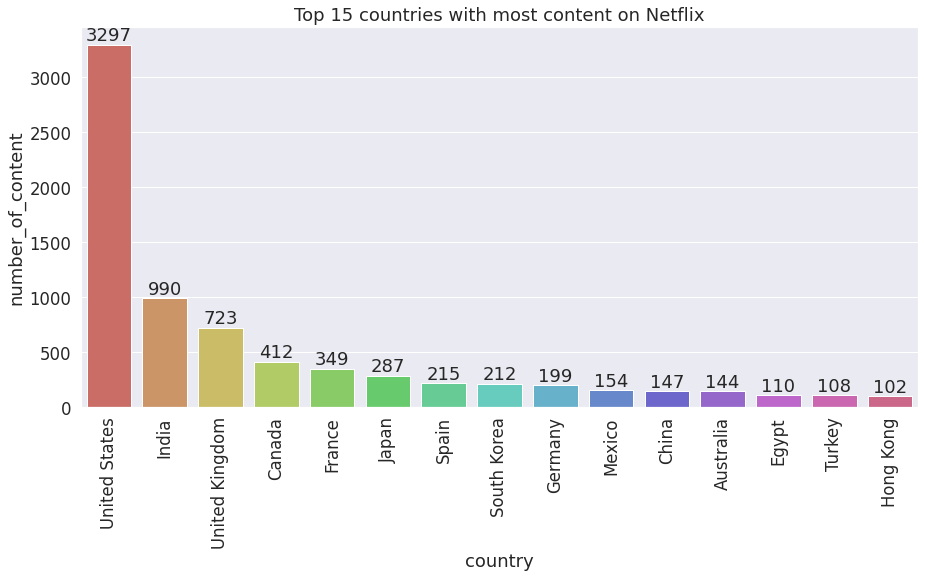

In [45]:
plt.figure(figsize=(15, 7))
g =sns.barplot(x=country_df.head(15)['country'], y = country_df.head(15)['number_of_content'], data=pd.melt(country_df) , palette = 'hls')
g.set_xticklabels(labels = country_df['country'], rotation=90)
g.set_title(f"Top 15 countries with most content on Netflix")

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

* Most content on Netflix comes from United States. 
* 2nd & 3rd most content creating countries are India and United Kingdom.

### Rating of Movies and Shows:

What are the unique ratings for movies and shows on netflix?

In [46]:
print(f'The unique ratings are -',list(df['rating'].unique()))

The unique ratings are - ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan, 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']


Number of Shows and Movies Rating-wise:

In [47]:
content_rating = df['rating'].value_counts().reset_index().rename(columns = {'index':'rating', 'rating':'count'})
content_rating

,rating,count
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


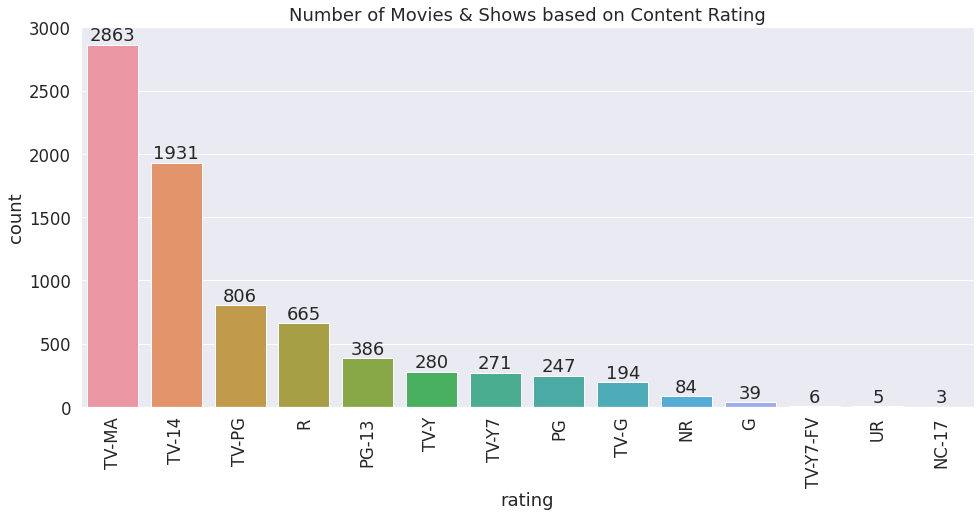

In [48]:
# visualization
plt.figure(figsize=(16, 7))
g =sns.barplot(x=content_rating['rating'], y = content_rating['count'], data=pd.melt(content_rating))
g.set_xticklabels(labels = content_rating['rating'], rotation=90)
g.set_title(f"Number of Movies & Shows based on Content Rating")

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

* We can see that TV-MA is the most popular rating type, followed by TV-14, TV-PG & R...

Number of shows and movies based on content rating for top 3 countries with most content ---

In [49]:
# top 3 countries with most content are - 
top_3_countries = list(country_df['country'].head(3).values)

top_3_countries

['United States', 'India', 'United Kingdom']

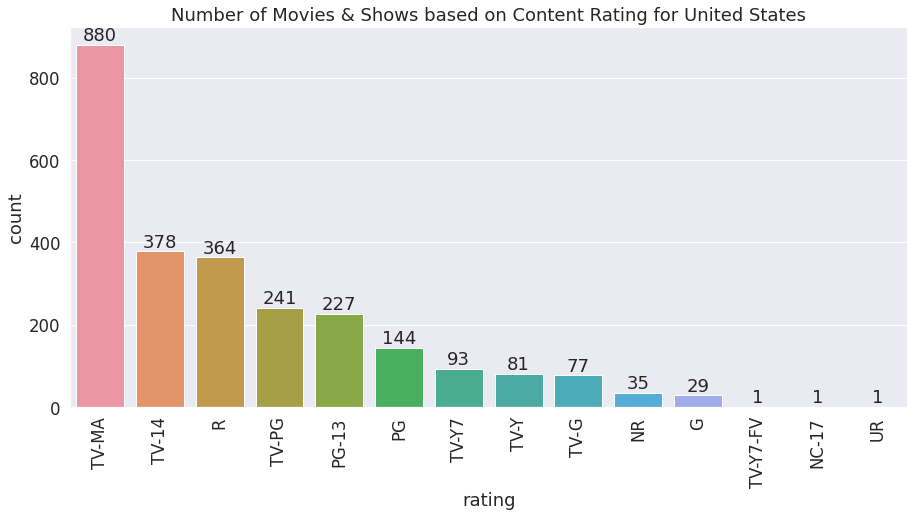

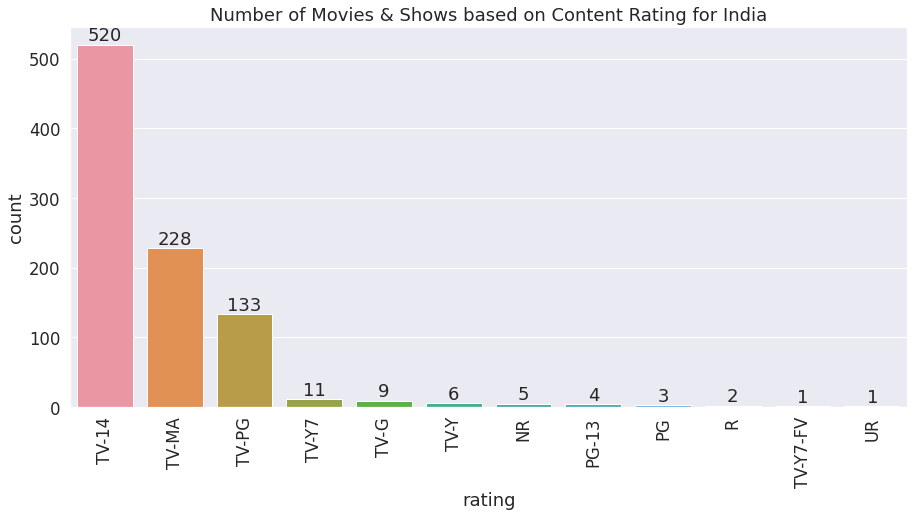

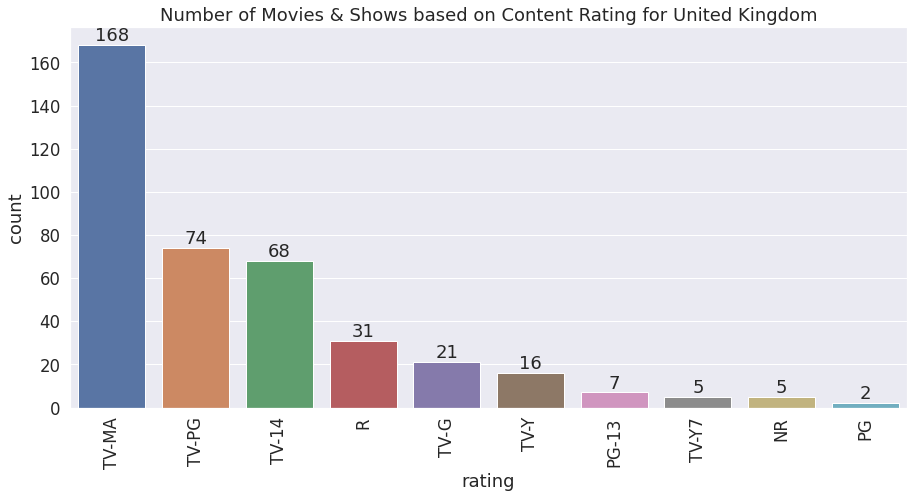

In [50]:
# visualizing top 3 countries prefer what type of content
for i in top_3_countries:
  
  crdf = df[df['country']== i]['rating'].value_counts().reset_index().rename(columns = {'index': 'rating', 'rating': 'count'})
  plt.figure(figsize=(15, 7))
  g = sns.barplot(x=crdf['rating'], y = crdf['count'], data=pd.melt(crdf))
  g.set_xticklabels(labels = crdf['rating'], rotation=90)
  g.set_title(f"Number of Movies & Shows based on Content Rating for {i}")

  for p in g.patches:
      g.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
  plt.show()

<b> Observation :</b>

* For **United States**, top 3 rating types are - 
1. TV-MA, 
2. TV-14
3. R
* For **India**, top 3 content ratings are - 
1. TV-14, 
2. TV-MA 
3. TV-PG.

* For **United Kingdom**, it is -
1. TV-MA,
2. TV-PG,
3. TV-14


### For the next part of the analysis, it will be better if we do it for Movies and TV shows separately...

In [51]:
# creating dataframe for only movies
movie_df = df[df['type'] == 'Movie']
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,yes,[Mexico]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,no,[Singapore]


In [52]:
# creating dataframe for TV shows only
tv_df = df[df['type'] == 'TV Show']
tv_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,yes,[Brazil]
5,s6,TV Show,46,Serdar Akar,"Erdal BeÅikÃ§ioÄlu, Yasemin Allen, Melis Bir...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,no,[Turkey]


### Directors with most movies:

In [53]:
dir = movie_df['director'].value_counts().reset_index().rename(columns = {'index': 'director', 'director': 'movies'}).head(20)
dir

,director,movies
0,"RaÃºl Campos, Jan Suter",18
1,Marcus Raboy,15
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Youssef Chahine,12
5,Jay Chapman,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Johnnie To,8


Text(0.5, 1.0, 'directors with most movies')

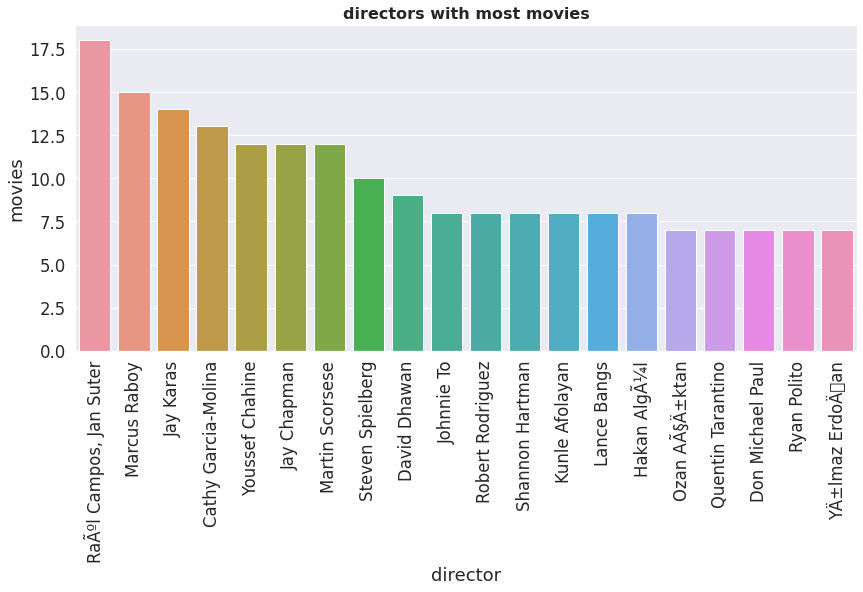

In [54]:
plt.figure(figsize=(14,6))
g = sns.barplot(x=dir['director'], y = dir['movies'], data=pd.melt(dir))
g.set_xticklabels(labels = dir['director'], rotation=90)
g.set_title(f"directors with most movies",size='16',fontweight="bold")

These are top 20 directors with most movies on Netflix.

### Directors with most TV Shows:

In [55]:
dir_tv = tv_df['director'].value_counts().reset_index().rename(columns = {'index': 'director', 'director': 'tv_shows'}).head(15)
dir_tv

,director,tv_shows
0,Alastair Fothergill,3
1,Ken Burns,2
2,Shin Won-ho,2
3,Iginio Straffi,2
4,Rob Seidenglanz,2
5,Stan Lathan,2
6,Serdar Akar,1
7,"Jani Lachauer, Jakob Schuh",1
8,Jalil Lespert,1
9,Jay Chandrasekhar,1


Text(0.5, 1.0, 'directors with most TV Shows')

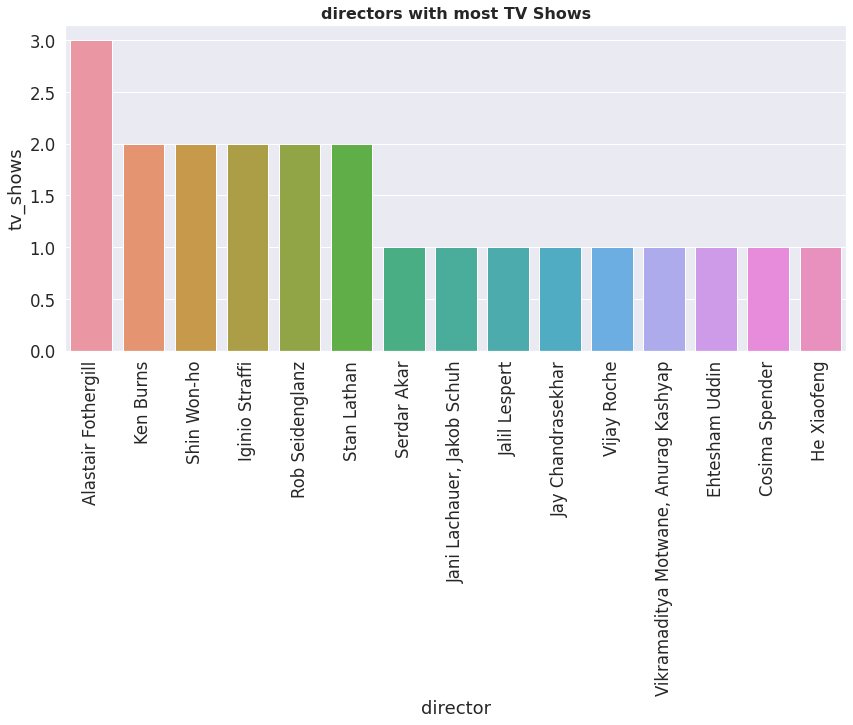

In [56]:
plt.figure(figsize=(14, 6))
g = sns.barplot(x=dir_tv['director'], y = dir_tv['tv_shows'], data=pd.melt(dir))
g.set_xticklabels(labels = dir_tv['director'], rotation=90)
g.set_title(f"directors with most TV Shows",size='16',fontweight="bold")

### Duration of movies:

In [57]:
movie_df['duration'].astype(str)

movie_df['duration_in_minutes'] = movie_df['duration'].apply(lambda x: x.split(' '))
movie_df['duration_in_minutes'] = movie_df['duration_in_minutes'].apply(lambda x: x[0])
# movie_df.drop('duration', inplace = True, axis =1)

In [58]:
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list,duration_in_minutes
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,yes,[Mexico],93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,no,[Singapore],78


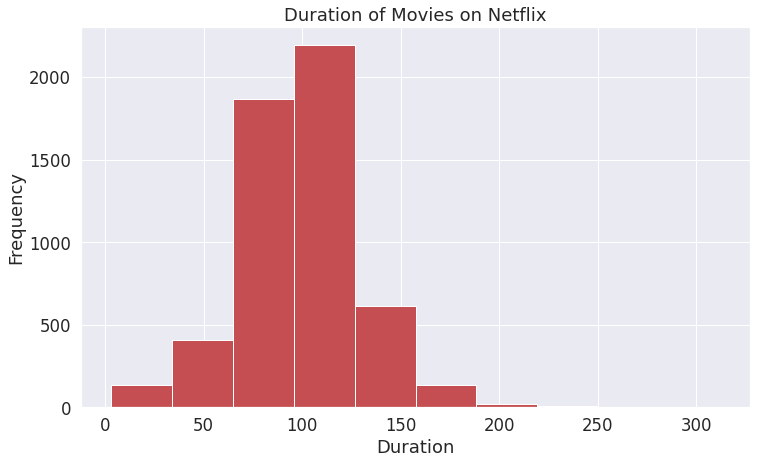

In [59]:
plt.figure(figsize=(12, 7))
plt.title(f"Duration of Movies on Netflix")
plt.xlabel('Duration')
movie_df['duration_in_minutes'].astype(float).plot(kind = 'hist', color = 'r')

We see that most movies have a duration of 90 - 120 minutes.

### Seasons of TV Shows:

In [60]:
tv_df['duration'].astype(str)

tv_df['duration_in_seasons'] = tv_df['duration'].apply(lambda x: x.split(' '))
tv_df['duration_in_seasons'] = tv_df['duration_in_seasons'].apply(lambda x: x[0])
# tv_df.drop('duration', inplace = True, axis =1)

In [61]:
tv_df['duration_in_seasons'].unique()

array(['4', '1', '2', '3', '5', '9', '8', '6', '11', '7', '13', '12',
       '10', '16', '15'], dtype=object)

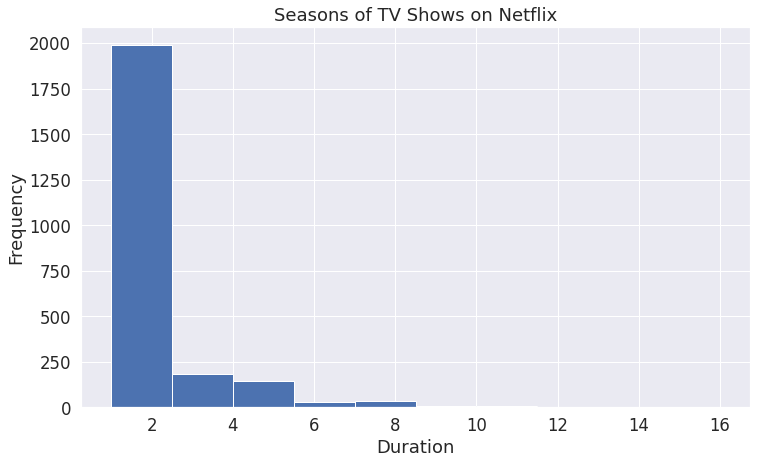

In [62]:
plt.figure(figsize=(12, 7))
plt.title(f"Seasons of TV Shows on Netflix")
plt.xlabel('Duration')
tv_df['duration_in_seasons'].astype(float).plot(kind = 'hist')
# tv_df['duration_in_seasons'].astype(float).plot(kind = 'kde')

Most shows have 1 or 2 seasons only. 

Checking which shows have the highest number of seasons:

In [63]:
print(f"The maximum number of seasons we have in the data is {tv_df['duration_in_seasons'].max()} seasons. \n")
print(f"The shows with the maximum number of seasons are - {tv_df[tv_df['duration_in_seasons'] == tv_df['duration_in_seasons'].max()]['title'].values}")

The maximum number of seasons we have in the data is 9 seasons. 

The shows with the maximum number of seasons are - ['American Horror Story' 'Call the Midwife' 'Club Friday The Series 6'
 'Forensic Files' 'Naruto' 'Still Game' 'The Office (U.S.)'
 'The Walking Dead']


### Movies added over the years and different months:

In [64]:
movie_df['date_added'] = pd.to_datetime(movie_df['date_added'])

In [65]:
movie_df['year_added'] = pd.DatetimeIndex(movie_df['date_added']).year
# movie_df['year_added']

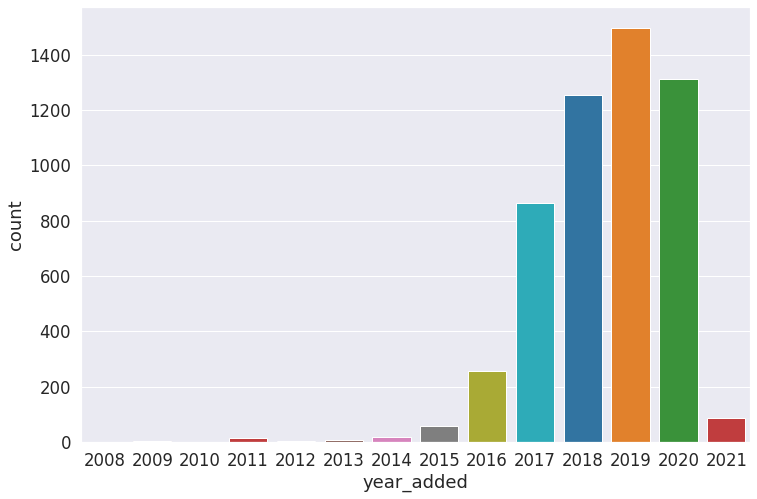

In [66]:
# Plotting the Countplot 
plt.figure(figsize=(12,8))
ax=sns.countplot('year_added',data= movie_df, palette = "tab10")

* We see the pattern that more and more movies were added on Netflix throughout the years.
* In the year 2019, the numbers peaked.
* A significant decrease in the numbers can be noticed on 2021 as a result of Covid.

In [67]:
movie_df['month_added'] = pd.DatetimeIndex(movie_df['date_added']).month

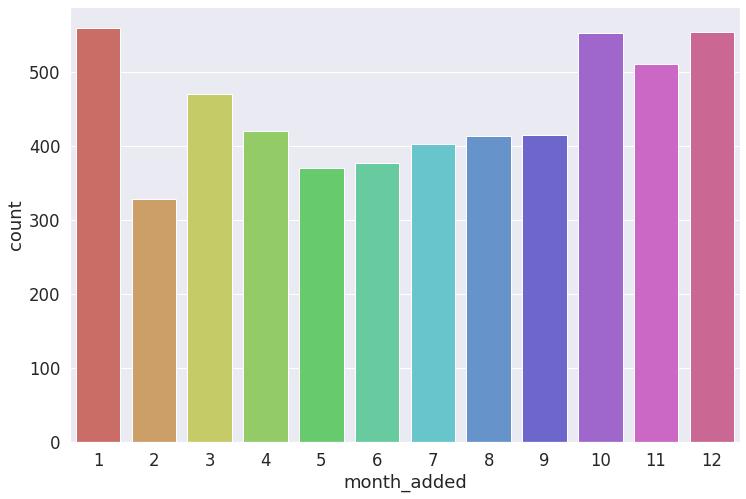

In [68]:
# Plotting the Countplot 
plt.figure(figsize=(12,8))
ax=sns.countplot('month_added',data= movie_df, palette = 'hls')

* In the month of February, the least number of movies are added. 
* From October to December, and also on January, we notice that most number of movies are added on Netflix.

### TV Shows added throughout the years and in different months:

In [69]:
tv_df['date_added'] = pd.to_datetime(tv_df['date_added'])

In [70]:
tv_df['year_added'] = pd.DatetimeIndex(tv_df['date_added']).year

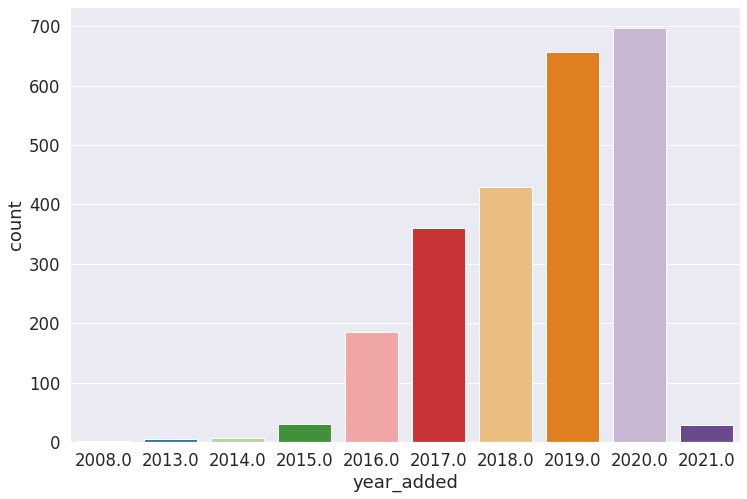

In [71]:
# Plotting the Countplot 
plt.figure(figsize=(12,8))
ax=sns.countplot('year_added',data= tv_df, palette = "Paired")

We notice a similar kind of pattern as movies. Year 2021 took a hit beacuse of the pandemic.

In [72]:
tv_df['month_added'] = pd.DatetimeIndex(tv_df['date_added']).month

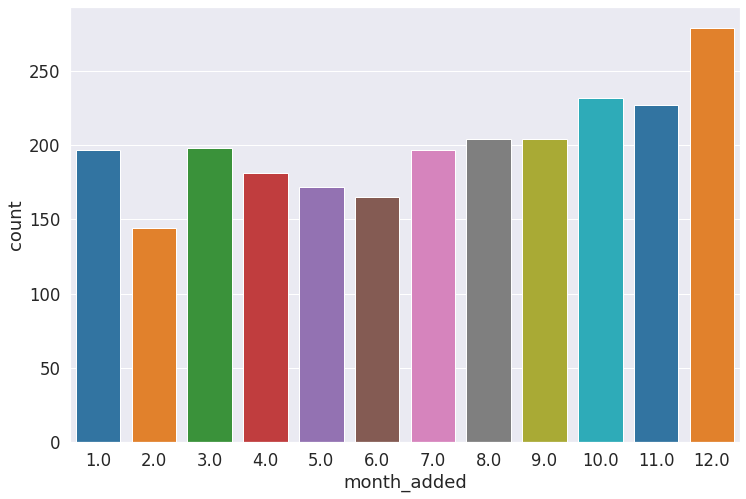

In [73]:
# Plotting the Countplot 
plt.figure(figsize=(12,8))
ax=sns.countplot('month_added',data= tv_df, palette = "tab10")

In the month of December, most number of shows are added.

### Comparison of Movies & TV Shows based on how many of each were added every month...

In [74]:
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

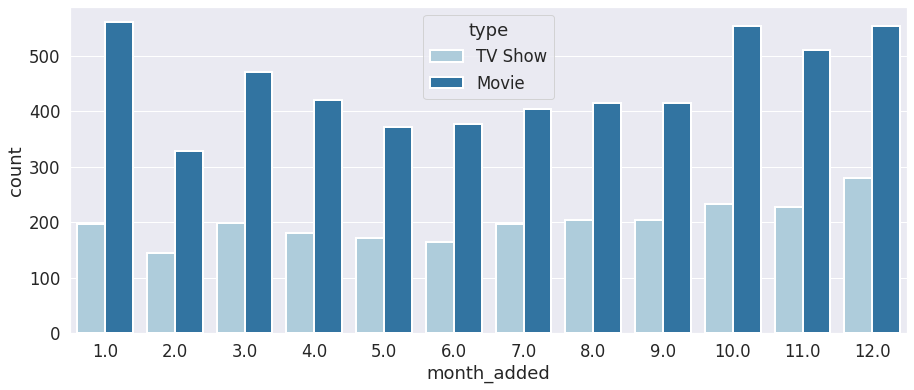

In [75]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month_added', hue='type',lw=2, data=df, ax=ax, palette = 'Paired')

### Movies Duration Rating wise:

In [76]:
duration_rating = movie_df.groupby(['rating'])['duration_in_minutes'].median().reset_index()
# duration_rating.sort_values('duration_in_minutes', ascending = False)

Text(0.5, 1.0, 'Duration of Movies of Different Content Rating Types')

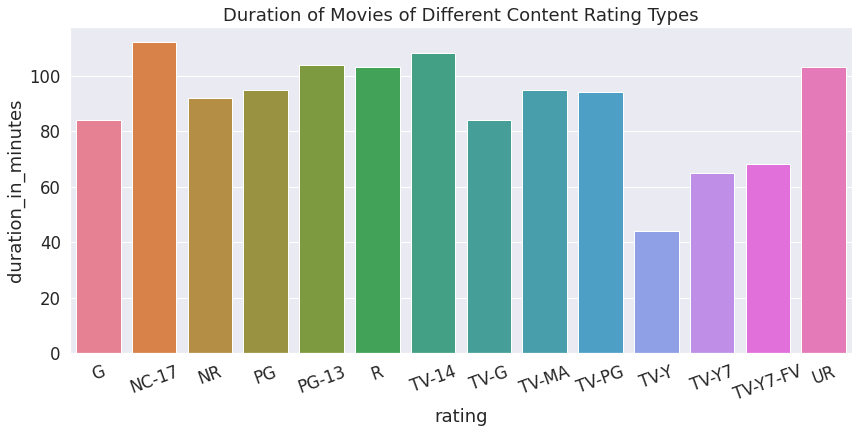

In [77]:
plt.figure(figsize=(14, 6))
g = sns.barplot(x=duration_rating['rating'], y = duration_rating['duration_in_minutes'], data=pd.melt(duration_rating), palette = 'husl')
g.set_xticklabels(labels = duration_rating['rating'], rotation=20)
g.set_title(f"Duration of Movies of Different Content Rating Types")

<b> Observations :</b>

* TV-Y rating suggests that the content is for children of all age. And we can see that, movies with this content rating has lowest average(median) runtime.

* NC-17 rating means that the content is not suitable for audience below 17 years of age.
For this rating type, the movies have the highest duration or runtime.

### TV Shows Duration Rating wise:

In [78]:
duration_rating = tv_df.groupby(['rating'])['duration_in_seasons'].median().reset_index()
# duration_rating.sort_values('duration_in_minutes', ascending = False)

Text(0.5, 1.0, 'Duration of TV Shows of Different Content Rating Types')

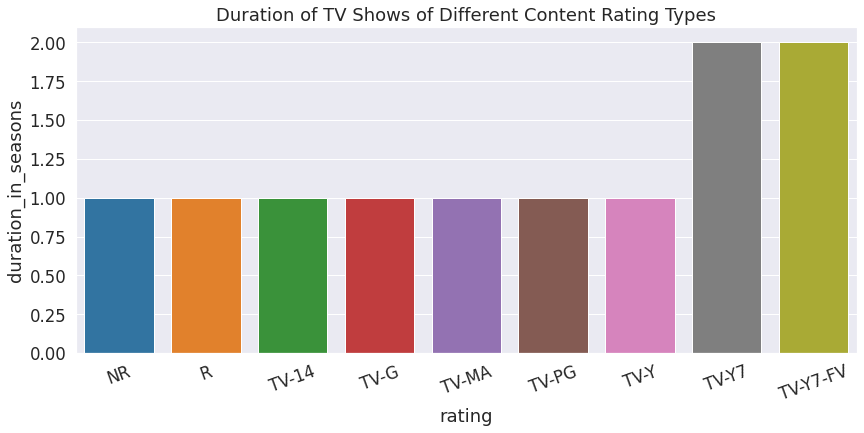

In [79]:
plt.figure(figsize=(14, 6))
g = sns.barplot(x=duration_rating['rating'], y = duration_rating['duration_in_seasons'], data=pd.melt(duration_rating), palette = 'tab10')
g.set_xticklabels(labels = duration_rating['rating'], rotation=20)
g.set_title(f"Duration of TV Shows of Different Content Rating Types")

In [80]:
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list,duration_in_minutes,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,yes,[Mexico],93,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,no,[Singapore],78,12


### Actors with most movie Credits on Netflix:

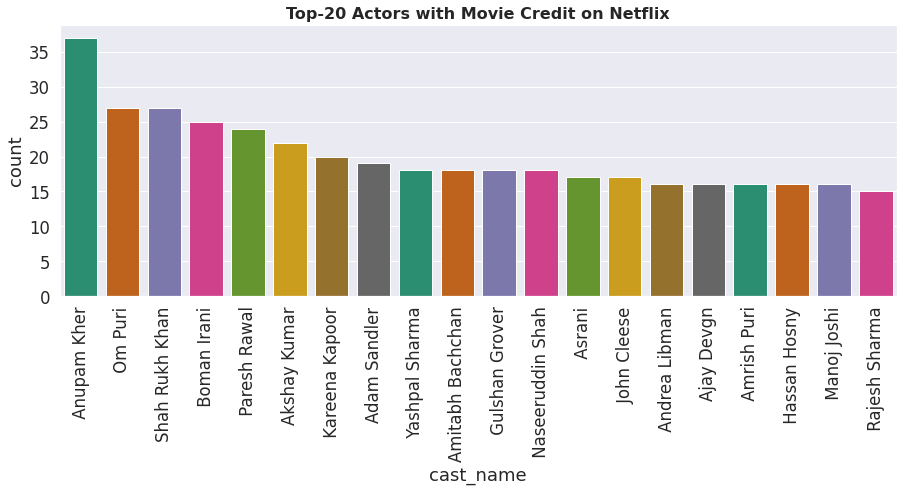

In [81]:
# Top 20 actors netflix
movie_df['cast_name'] = movie_df['cast'].astype('str').apply(lambda x :  x.split(',')) 
cast_count = []
for i in movie_df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 Actors with Movie Credit on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

* Anupam Kher has highest number of movie credits on Netflix.

### Top Genres for Movies:

In [82]:
genre = movie_df['listed_in'].value_counts().reset_index().rename(columns = {'index': 'genres', 'listed_in': 'count'}).head(20)

Text(0.5, 1.0, 'Top Genres for Movies')

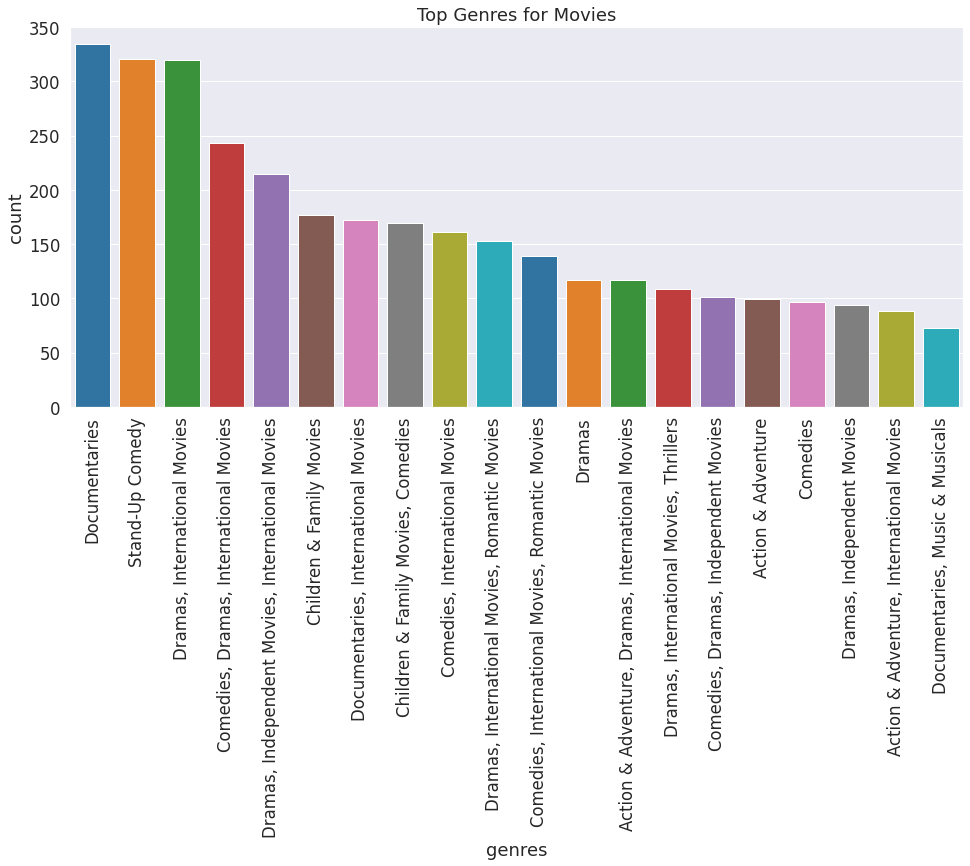

In [83]:
plt.figure(figsize=(16, 7))
g =sns.barplot(x=genre['genres'], y = genre['count'], data=pd.melt(genre), palette = 'tab10')
g.set_xticklabels(labels = genre['genres'], rotation=90)
g.set_title(f"Top Genres for Movies")

Documentries, Stand-Up Comedy, Drama & International Movies are the top listed movies on Netflix.

### Top genres for TV Shows:

In [84]:
genre = tv_df['listed_in'].value_counts().reset_index().rename(columns = {'index': 'genres', 'listed_in': 'count'}).head(20)

Text(0.5, 1.0, 'Top Genres for TV Shows')

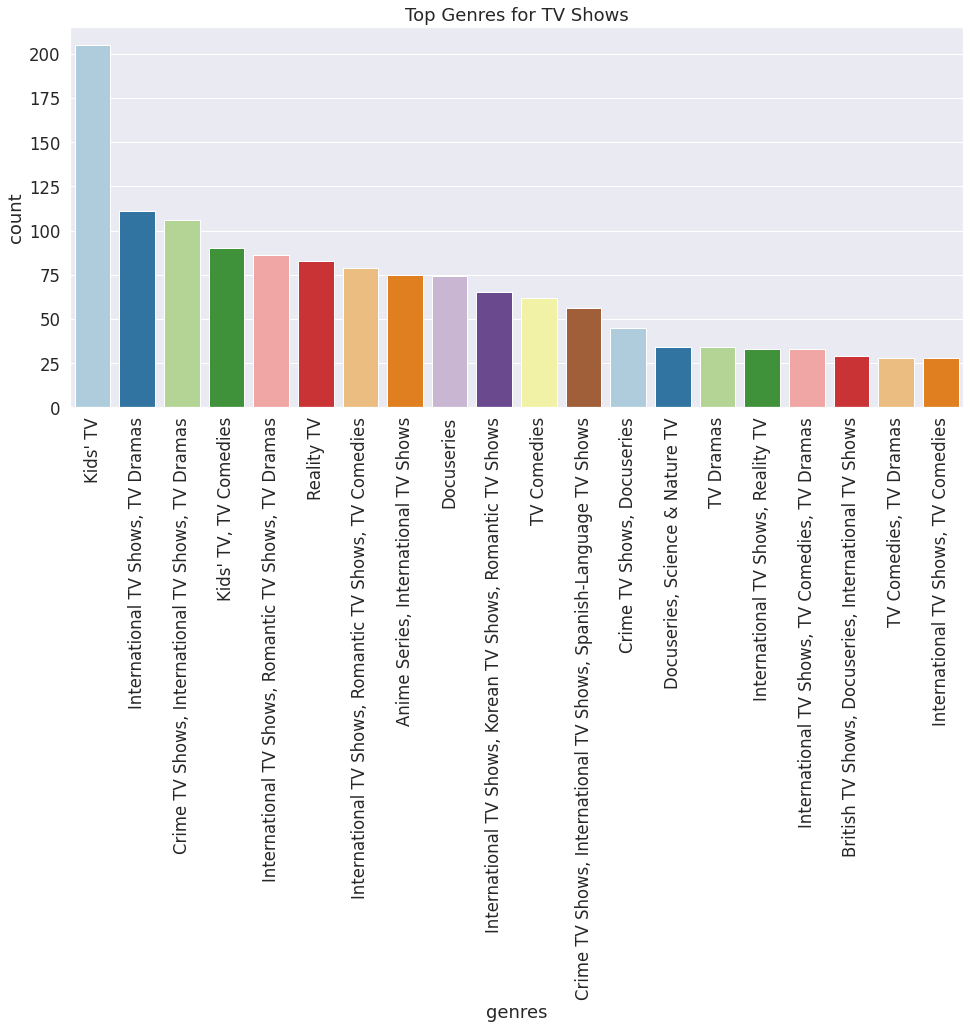

In [85]:
plt.figure(figsize=(16, 7))
g =sns.barplot(x=genre['genres'], y = genre['count'], data=pd.melt(genre), palette = 'Paired')
g.set_xticklabels(labels = genre['genres'], rotation=90)
g.set_title(f"Top Genres for TV Shows")

Kids' TV, International TV Shows, TV Dramas are top listed genres for shows.

## **Pre-processing:**

In [86]:
# making a copy of the dataframe
df1 = df.copy()

### Feature Selection for Modeling :

To perform clustering and build a recommendation system, we will keep certain columns that will be helpful. So, let's list out the columns that we will need.

We need to cluster similar TV Shows and Movies. Meaning, we will mainly look for content of similar **Description**, **Rating** and **Genres**. Then we can also make the system better by including the **Director** & top **Casts** from these movies and shows. 

At this point in time, we are not concerned about differentiating between TV shows and Movies. Rather, we are trying to find similar content regardless of them being a movie or a show.

So, the most important columns are going to be - 



1.   <b>Description</b>
2.   <b>Rating</b>
3.   <b>Listed In (Genres)</b>
4.   <b>Director</b>
5.   <b>Cast</b> 

For Recommendation, **Director** and **Cast** columns have great purpose but, when trying to cluster similar movies and shows, these two columns might not be that useful. As same directors and actors can work in different kinds of movies. So, using these two columns while forming clusters might not be great idea. For that reason, what we can do is that, we can form clusters with and without including the 'Director' and 'Cast' columns and compare results.

If the clusters formed, does not give good results with these features, then we shall also try forming clusters without the Director and Cast features.


### Null Value Treatment:

In [87]:
missing = missing_value_checker(df1)
missing.sort_values('observations_missing', ascending = False)

,observations_missing,percentage_missing
feature,,
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
year_added,10,0.13
month_added,10,0.13
rating,7,0.09
show_id,0,0.00
type,0,0.00


We can see that the some of columns that are important for us, have missing values. Columns like Director, Cast and Rating are object type. So, we can not use mean or median. Also, we do not want to use mode for null value imputation as well. 

We will impute these null values with 'unknown'. But this might also not be good enough because Director column has 30% null values and Cast column has more than 9% null values. 

We shall see if this gives good results or not. If not, then we will take some different approaches.

In [88]:
df1[['director', 'cast', 'country', 'rating']] = df1[['director', 'cast', 'country', 'rating']].fillna('unknown')

In [89]:
df1.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      10
originals        0
country_list     0
month_added     10
dtype: int64

Now. we do not have any null values for those columns that we will be using...

### Transforming Listed In column:

This column contains the values of different Genres for movies and shows. Transformation made on this column will help with clustering similar content.

In [90]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list,month_added
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,yes,[Brazil],8.0
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,yes,[Mexico],12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,no,[Singapore],12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,no,[United States],11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,no,[United States],1.0


In [91]:
df1['listed_in'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [92]:
df1['new_listed_in'] = df1['listed_in'].astype(str)

In [93]:
df1['new_listed_in'] = df1['new_listed_in'].apply(lambda x: list(x.split(',')))

In [94]:
df1['new_listed_in'].apply(lambda x: [s.lstrip() for s in x])

0       [International TV Shows, TV Dramas, TV Sci-Fi ...
1                          [Dramas, International Movies]
2                   [Horror Movies, International Movies]
3       [Action & Adventure, Independent Movies, Sci-F...
4                                                [Dramas]
                              ...                        
7782                       [Dramas, International Movies]
7783     [Dramas, International Movies, Music & Musicals]
7784    [Documentaries, International Movies, Music & ...
7785                 [International TV Shows, Reality TV]
7786                    [Documentaries, Music & Musicals]
Name: new_listed_in, Length: 7787, dtype: object

In [95]:
df1['new_listed_in'] = df1['new_listed_in'].apply(lambda x: [s.replace(" ", "").lower() for s in x])

In [96]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list,month_added,new_listed_in
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,yes,[Brazil],8.0,"[internationaltvshows, tvdramas, tvsci-fi&fant..."
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,yes,[Mexico],12.0,"[dramas, internationalmovies]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,no,[Singapore],12.0,"[horrormovies, internationalmovies]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,no,[United States],11.0,"[action&adventure, independentmovies, sci-fi&f..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,no,[United States],1.0,[dramas]


### Transforming Cast column:

For each movie or show, we have multiple cast members. Generally we find the leading actors' name in the beginning. 

We will pick top 4 cast members for each movie. This will to find other movies and shows with those similar actors. It can be helpful for content based filtering.

In [97]:
df1['cast'][3]

'Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane'

In [98]:
df1['new_cast'] = df1['cast'].astype(str)

In [99]:
df1['new_cast'] = df1['new_cast'].apply(lambda x: list(x.split(',')))

In [100]:
df1['new_cast'].apply(lambda x: [s.lstrip() for s in x])

0       [JoÃ£o Miguel, Bianca Comparato, Michel Gomes,...
1       [DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serran...
2       [Tedd Chan, Stella Chung, Henley Hii, Lawrence...
3       [Elijah Wood, John C. Reilly, Jennifer Connell...
4       [Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...
                              ...                        
7782    [Imad Creidi, Antoinette Turk, Elias Gergi, Ca...
7783    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...
7784                                            [Nasty C]
7785                         [Adriano Zumbo, Rachel Khoo]
7786                                            [unknown]
Name: new_cast, Length: 7787, dtype: object

In [101]:
df1['new_cast'] = df1['new_cast'].apply(lambda x: [s.replace(" ", "").lower() for s in x])

In [102]:
df1['new_cast'] = df1['new_cast'].apply(lambda x: x[:4]) # picking top 4 cast members

In [103]:
# top 4 Cast Members
df1['new_cast'][3][:4]

['elijahwood', 'johnc.reilly', 'jenniferconnelly', 'christopherplummer']

In [104]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list,month_added,new_listed_in,new_cast
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,yes,[Brazil],8.0,"[internationaltvshows, tvdramas, tvsci-fi&fant...","[joã£omiguel, biancacomparato, michelgomes, ro..."
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,yes,[Mexico],12.0,"[dramas, internationalmovies]","[demiã¡nbichir, hã©ctorbonilla, oscarserrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,no,[Singapore],12.0,"[horrormovies, internationalmovies]","[teddchan, stellachung, henleyhii, lawrencekoh]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,no,[United States],11.0,"[action&adventure, independentmovies, sci-fi&f...","[elijahwood, johnc.reilly, jenniferconnelly, c..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,no,[United States],1.0,[dramas],"[jimsturgess, kevinspacey, katebosworth, aaron..."


### Transforming Director column:

In [105]:
df1['director'][3]

'Shane Acker'

In [106]:
df1['new_director'] = df1['director'].astype(str)

In [107]:
df1['new_director'] = df1['new_director'].apply(lambda x: list(x.split(',')))

In [108]:
df1['new_director'].apply(lambda x: [s.lstrip() for s in x])

0                 [unknown]
1       [Jorge Michel Grau]
2            [Gilbert Chan]
3             [Shane Acker]
4          [Robert Luketic]
               ...         
7782          [Josef Fares]
7783          [Mozez Singh]
7784              [unknown]
7785              [unknown]
7786             [Sam Dunn]
Name: new_director, Length: 7787, dtype: object

In [109]:
df1['new_director'] = df1['new_director'].apply(lambda x: [s.replace(" ", "").lower() for s in x])

In [110]:
df1['new_director']

0               [unknown]
1       [jorgemichelgrau]
2           [gilbertchan]
3            [shaneacker]
4         [robertluketic]
              ...        
7782         [joseffares]
7783         [mozezsingh]
7784            [unknown]
7785            [unknown]
7786            [samdunn]
Name: new_director, Length: 7787, dtype: object

In [111]:
df1['new_director'] = df1['new_director'].apply(lambda x: x[:4])

In [112]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list,month_added,new_listed_in,new_cast,new_director
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,yes,[Brazil],8.0,"[internationaltvshows, tvdramas, tvsci-fi&fant...","[joã£omiguel, biancacomparato, michelgomes, ro...",[unknown]
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,yes,[Mexico],12.0,"[dramas, internationalmovies]","[demiã¡nbichir, hã©ctorbonilla, oscarserrano, ...",[jorgemichelgrau]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,no,[Singapore],12.0,"[horrormovies, internationalmovies]","[teddchan, stellachung, henleyhii, lawrencekoh]",[gilbertchan]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,no,[United States],11.0,"[action&adventure, independentmovies, sci-fi&f...","[elijahwood, johnc.reilly, jenniferconnelly, c...",[shaneacker]
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,no,[United States],1.0,[dramas],"[jimsturgess, kevinspacey, katebosworth, aaron...",[robertluketic]


### Rating column transformation:

In [113]:
df1['new_rating'] = df1['rating'].astype(str)

In [114]:
df1['new_rating'] = df1['new_rating'].apply(lambda x: list(x.split('-')))

In [115]:
df1['new_rating'] = df1['new_rating'].apply(lambda x: [''.join(x).lower()])

In [116]:
df1[ 'new_rating']

0       [tvma]
1       [tvma]
2          [r]
3       [pg13]
4       [pg13]
         ...  
7782    [tvma]
7783    [tv14]
7784    [tvma]
7785    [tvpg]
7786    [tvma]
Name: new_rating, Length: 7787, dtype: object

### Transformation of Description feature:

Description column contains the short summary of the movie. In order to get the best out of this feature, we will need to perform multiple text-preprocessing step. 

The steps we will be taking for this part are - 

* <b> Punctuation Removal :</b> Presence of signs and punctuations doesn't make sense. It only makes the data noisy. So, we will remove those.
* <b> Lowercase :</b> Converting all the text to lowercase is sort of a thumbrule for text preprocessing.
* <b> Stopwords Removal :</b> Very commonly occuring words which only contribute for sentence formation are considered stopwords. These do not contribute to the meaning that much. So, we will remove that.
* <b> Tokenization :</b> Tokenizations is the process for converting words into tokens.
* <b> Lemmatization :</b> This helps to bring every word down to it's base form. This step is necessary to identify the same words in the corpus that conveys the same meaning. Another similar substitute for Lemmatization can be Stemming. But usually Lemmatization performs better than Stemming. So, we decided to use Lemmatization for this project.

In [117]:
df1['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [118]:
stop_words = stopwords.words('english')

In [119]:
# df1 = df.copy()

In [120]:
# removing punctuations

df1["clean_text"] = df1["description"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
df1["clean_text"] = df1["clean_text"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='..._]", " ", s).split()))
df1["clean_text"] = df1["clean_text"].apply(lambda s: ' '.join(re.sub(r'[^\w\s]', '', s).split()))

In [121]:
# stopwords remover
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop_words] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [122]:
df1["clean_text"] = df1["clean_text"].apply(lambda s: rem_en(s))

In [123]:
tokeniser = nltk.tokenize.WhitespaceTokenizer()
df1["clean_text"] = df1["clean_text"].apply(lambda x: tokeniser.tokenize(x))  # Tokenization

lemmatiser = WordNetLemmatizer()
df1["clean_text"] = df1["clean_text"].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])  # Lemmatization

In [124]:
# comparing the text columns before and after transformation
df1[['clean_text', 'description']]

,clean_text,description
0,"[future, elite, inhabit, island, paradise, far...",In a future where the elite inhabit an island ...
1,"[devastate, earthquake, hit, mexico, city, tra...",After a devastating earthquake hits Mexico Cit...
2,"[army, recruit, find, dead, fellow, soldier, f...","When an army recruit is found dead, his fellow..."
3,"[postapocalyptic, world, ragdoll, robots, hide...","In a postapocalyptic world, rag-doll robots hi..."
4,"[brilliant, group, students, become, cardcount...",A brilliant group of students become card-coun...
...,...,...
7782,"[lebanon, civil, war, deprive, zozo, family, l...",When Lebanon's Civil War deprives Zozo of his ...
7783,"[scrappy, poor, boy, worm, way, tycoon, dysfun...",A scrappy but poor boy worms his way into a ty...
7784,"[documentary, south, african, rapper, nasty, c...","In this documentary, South African rapper Nast..."
7785,"[dessert, wizard, adriano, zumbo, look, next, ...",Dessert wizard Adriano Zumbo looks for the nex...


In [125]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,originals,country_list,month_added,new_listed_in,new_cast,new_director,new_rating,clean_text
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,yes,[Brazil],8.0,"[internationaltvshows, tvdramas, tvsci-fi&fant...","[joã£omiguel, biancacomparato, michelgomes, ro...",[unknown],[tvma],"[future, elite, inhabit, island, paradise, far..."
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,yes,[Mexico],12.0,"[dramas, internationalmovies]","[demiã¡nbichir, hã©ctorbonilla, oscarserrano, ...",[jorgemichelgrau],[tvma],"[devastate, earthquake, hit, mexico, city, tra..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,no,[Singapore],12.0,"[horrormovies, internationalmovies]","[teddchan, stellachung, henleyhii, lawrencekoh]",[gilbertchan],[r],"[army, recruit, find, dead, fellow, soldier, f..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,no,[United States],11.0,"[action&adventure, independentmovies, sci-fi&f...","[elijahwood, johnc.reilly, jenniferconnelly, c...",[shaneacker],[pg13],"[postapocalyptic, world, ragdoll, robots, hide..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,no,[United States],1.0,[dramas],"[jimsturgess, kevinspacey, katebosworth, aaron...",[robertluketic],[pg13],"[brilliant, group, students, become, cardcount..."


### Concatenating all the columns that will be used for clustering...

In [126]:
df1['tags1'] = df1['new_listed_in'] + df1['new_cast'] + df1['new_director'] + df1['clean_text'] + df1['new_rating']  # tags1 contains information about directors and casts


# tags2 does not contains information about directors and casts
df1['tags2'] = df1['new_listed_in'] + df1['clean_text'] + df1['new_rating']  

In [127]:
df1['tags1'] = df1.tags1.apply(lambda x: ' '.join(x))

df1['tags2'] = df1.tags2.apply(lambda x: ' '.join(x))


In [128]:
df1['tags1'][3]

'action&adventure independentmovies sci-fi&fantasy elijahwood johnc.reilly jenniferconnelly christopherplummer shaneacker postapocalyptic world ragdoll robots hide fear dangerous machine exterminate brave newcomer join group pg13'

In [129]:
df1['tags2'][3]

'action&adventure independentmovies sci-fi&fantasy postapocalyptic world ragdoll robots hide fear dangerous machine exterminate brave newcomer join group pg13'

### Applying TF-IDF Vectorization:

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

**Terminologies :**

* **Term Frequency:** In document d, the frequency represents the number of instances of a given word t. Therefore, we can see that it becomes more relevant when a word appears in the text, which is rational. Since the ordering of terms is not significant, we can use a vector to describe the text in the bag of term models. For each specific term in the paper, there is an entry with the value being the term frequency.

    The weight of a term that occurs in a document is simply proportional to the term frequency.

         tf(t,d) = count of t in d / number of words in d


* **Document Frequency:** This tests the meaning of the text, which is very similar to TF, in the whole corpus collection. The only difference is that in document d, TF is the frequency counter for a term t, while df is the number of occurrences in the document set N of the term t. In other words, the number of papers in which the word is present is DF.

       df(t) = occurrence of t in documents

* **Inverse Document Frequency:** Mainly, it tests how relevant the word is. The key aim of the search is to locate the appropriate records that fit the demand. Since tf considers all terms equally significant, it is therefore not only possible to use the term frequencies to measure the weight of the term in the paper. First, find the document frequency of a term t by counting the number of documents containing the term:

      df(t) = N(t)
      where
      df(t) = Document frequency of a term t
      N(t) = Number of documents containing the term t

   Term frequency is the number of instances of a term in a single document only; although the frequency of the document is the number of separate documents in which the term appears, it depends on the entire corpus. Now let’s look at the definition of the frequency of the inverse paper. The IDF of the word is the number of documents in the corpus separated by the frequency of the text.

In [130]:
#Applying Tfidf Vectorizer on tags1 feature
tfidfmodel = TfidfVectorizer(max_features=3000) # selecting 3000 max features
X1_tfidf = tfidfmodel.fit_transform(df1['tags1'])
X1_tfidf.shape

(7787, 3000)

In [131]:
#Applying Tfidf Vectorizer on tags1 feature
tfidfmodel = TfidfVectorizer(max_features=2000) # selecting 5000 max features
X2_tfidf = tfidfmodel.fit_transform(df1['tags2'])
X2_tfidf.shape

(7787, 2000)

In [132]:
# most important word features
list(tfidfmodel.get_feature_names())

['000',
 '10',
 '100',
 '10yearold',
 '11yearold',
 '12',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '19thcentury',
 '20',
 '30',
 '50',
 'abandon',
 'abduct',
 'abilities',
 'ability',
 'aboard',
 'abuse',
 'abusive',
 'academy',
 'accept',
 'access',
 'accident',
 'accidentally',
 'acclaim',
 'account',
 'accuse',
 'achieve',
 'across',
 'act',
 'action',
 'activist',
 'actor',
 'actors',
 'actress',
 'actually',
 'adapt',
 'adaptation',
 'addict',
 'addiction',
 'adopt',
 'adorable',
 'adult',
 'adulthood',
 'adults',
 'adventure',
 'adventurous',
 'affair',
 'affairs',
 'affect',
 'afghanistan',
 'afloat',
 'africa',
 'african',
 'aftermath',
 'age',
 'agency',
 'agent',
 'agents',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aim',
 'air',
 'alex',
 'alien',
 'alive',
 'allow',
 'ally',
 'alone',
 'along',
 'also',
 'alter',
 'always',
 'amateur',
 'amaze',
 'ambition',
 'ambitious',
 'america',
 'american',
 'amid',
 'among',
 'ancient',
 'angeles',
 'animal',
 'animals',
 'anima

In [133]:
# convert X into array form for clustering
X1 = X1_tfidf.toarray() 

X2 = X2_tfidf.toarray()

In [134]:
similarity1 = cosine_similarity(X1)

similarity2 = cosine_similarity(X2)
# similarity1